# Des tables à la modularité

Nous avons hier utilisé plusieurs bouts de code à plusieurs reprise :
* l'importation de _csv_ dans des listes de dictionnaire
* la recherche de ligne
* la fusion

Lorsqu'un code est utilisé plusieurs fois, on peut le placer dans une fonction. Pour rappel, voici une fonction calculant le nombre de voyelle dans une chaîne de caractères :

In [3]:
def nb_voyelles(chaine) :
    """
    Fonction comptant le nombre de voyelles dans une chaîne de caractère
    
    chaine est la chaîne de caractère
    
    Renvoie le nombre de voyelles
    """
    
    assert type(chaine) == str , f"chaine doit être du type str, vous avez fourni un {type(chaine)}"
    
    nb = 0
    for lettre in chaine :
        if lettre in ['a', 'e', 'i', 'o', 'u', 'y'] :
            nb += 1
    
    return nb

Par exemple :

In [4]:
nb_voyelles("bonjour")

3

Remarquez la ligne ``assert type(chaine) == str``. Elle permet de vérifier que la variable est bien du type ``str`` (string = chaîne de caractère). Après la virgule on trouve le message d'erreur.

Par exemple :

In [5]:
nb_voyelles(125)

AssertionError: chaine doit être du type str, vous avez fourni un <class 'int'>

Ces fonctions peuvent être regroupées dans des modules/bibliothèques. POur les utiliser il faut alors les importer.

Les codes utiles d'hier sont placés dans le module ``fonctions_utiles.py``. Pour l'importer vous pouvez simplement taper :

In [2]:
from fonctions_utiles import *

Cet import n'est pas très "propre" : nous importons toutes les fonctions (avec le \*) sans vraiment savoir si nous en avons besoin... Ce n'est pas grave pour l'instant. 

1. Allez jeter un oeil sur le module ``fonctions_utiles`` afin de voir quelles fonctions il contient et comment elles fonctionnent. 

Vous aurez bien noté que la fonction ``cherche`` renvoie deux arguments : le sous-tableau correspondant à la condition ainsi que sa longeur.

Du coup si l'on veut juste savoir combien d'élèves font ``anglais-espagnol``, on saisira :

``cherche(eleves, "ligne['Langues'] == 'anglais-espagnol'")[1]``

On récupère ainsi seuelement le deuxième élément renvoyé (d'indice 1)

Maintenant que vous connaissez l'outil, nous allons faire un TP plus long. Il va falloir charger le fichier _csv_ ``premieres.csv`` encodé en ``utf-8-sig`` et répondre aux questions suivantes :
* combien y-a-t-il d'élèves par classe ?
* combien d'élèves sont nés en janvier ? Et en février ?
* Faites un diagramme en barre du nombre d'élèves né par mois
* Combien d'élèves ont choisis NSI en 1er choix de spécialité ?
* Combien d'élèves ont choisis NSI en tout (quel que soit l'ordre de choix)
* Faire un diagramme en barre des effectifs par spécialité (pour info, les spés sont : ``specialites = ['LCE', 'HG', 'NSI', 'Maths', 'SES', 'Humanité', 'PC', 'Audiovisuel', 'SVT']``

Plus dur :
* Associer à chaque élève son triplet de spécialité
* Combien y-at-il de triplets différents ?
* Faire un diagramme en barre des effectifs par triplets

In [4]:
# import des élèves
eleves = csv_vers_dict("premieres.csv", ";", encoding='utf-8-sig')
eleves[:2]

[{'Nom': 'Eulalie Rivière',
  'Mois_Jour': 'October 6',
  'Année': '2002',
  'Langues': 'anglais-espagnol',
  'Choix_1': 'LCE',
  'Choix_2': 'HG',
  'Choix_3': 'SES',
  'Spé A': 'HG A',
  'Spé B': 'LCE B',
  'Spé C': 'SVT C',
  '1ère': '1'},
 {'Nom': 'Burrell Lapierre',
  'Mois_Jour': 'June 17',
  'Année': '2002',
  'Langues': 'anglais-espagnol',
  'Choix_1': 'Maths',
  'Choix_2': 'SES',
  'Choix_3': 'HG',
  'Spé A': 'HG A',
  'Spé B': 'Maths B1',
  'Spé C': 'SES C',
  '1ère': '1'}]

In [5]:
# Typage des données (les années de naissance et le numéro de la classe) :
for eleve in eleves :
    eleve['Année'] = int(eleve['Année'])
    eleve['1ère'] = int(eleve['1ère'])

In [10]:
# Le nombre d'élèves par classe
for i in range(1,8) :
    print("1ère",i,":", cherche(eleves,"ligne['1ère'] == " + str(i))[1], "élèves")

1ère 1 : 37 élèves
1ère 2 : 34 élèves
1ère 3 : 32 élèves
1ère 4 : 32 élèves
1ère 5 : 31 élèves
1ère 6 : 31 élèves
1ère 7 : 33 élèves


In [12]:
# Naissances par mois
mois = ['January',
        'February', 
        'March', 
        'April', 
        'May',
        'June', 
        'July',
        'August',
        'September',
        'October', 
        'November', 
        'December']

dico = {m : 0 for m in mois}

for m in mois :
    dico[m] = cherche(eleves, '"' + m + '" in ligne["Mois_Jour"]')[1]

In [13]:
dico

{'January': 17,
 'February': 24,
 'March': 13,
 'April': 14,
 'May': 19,
 'June': 21,
 'July': 13,
 'August': 23,
 'September': 27,
 'October': 21,
 'November': 22,
 'December': 16}

In [17]:
import matplotlib.pyplot as plt

plt.bar(dico.keys(), dico.values())
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

In [19]:
# élèves ayant choisi NSI en 1er
cherche(eleves, 'ligne["Choix_1"] == "NSI"')[1]

5

In [20]:
# élèves ayant choisi NSI en tout
cherche(eleves, 'ligne["Choix_1"] == "NSI" or ligne["Choix_2"] == "NSI" or ligne["Choix_3"] == "NSI"')[1]

26

In [23]:
# Les élèves par spécialité
specialites = ['LCE', 'HG', 'NSI', 'Maths', 'SES', 'Humanité', 'PC', 'Audiovisuel', 'SVT']

dico_spe = {spe : 0 for spe in specialites}

for spe in specialites :
    dico_spe[spe] = cherche(eleves, 'ligne["Choix_1"] == "' + spe + '" or ligne["Choix_2"] == "' + spe + '" or ligne["Choix_3"] == "' + spe + '"')[1]

dico_spe

{'LCE': 73,
 'HG': 96,
 'NSI': 26,
 'Maths': 159,
 'SES': 100,
 'Humanité': 26,
 'PC': 100,
 'Audiovisuel': 16,
 'SVT': 94}

In [24]:
plt.bar(dico_spe.keys(), dico_spe.values())
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

In [33]:
# Les triplets par élève. On trie le tableau pour éviter le bazar

for eleve in eleves :
    tab = sorted([eleve['Choix_1'],eleve['Choix_2'], eleve['Choix_3']])
    eleve['Triplet'] = str(tab)

eleves[:2]

[{'Nom': 'Eulalie Rivière',
  'Mois_Jour': 'October 6',
  'Année': 2002,
  'Langues': 'anglais-espagnol',
  'Choix_1': 'LCE',
  'Choix_2': 'HG',
  'Choix_3': 'SES',
  'Spé A': 'HG A',
  'Spé B': 'LCE B',
  'Spé C': 'SVT C',
  '1ère': 1,
  'Triplet': "['HG', 'LCE', 'SES']"},
 {'Nom': 'Burrell Lapierre',
  'Mois_Jour': 'June 17',
  'Année': 2002,
  'Langues': 'anglais-espagnol',
  'Choix_1': 'Maths',
  'Choix_2': 'SES',
  'Choix_3': 'HG',
  'Spé A': 'HG A',
  'Spé B': 'Maths B1',
  'Spé C': 'SES C',
  '1ère': 1,
  'Triplet': "['HG', 'Maths', 'SES']"}]

In [34]:
# Le diagramme des triplets
dico_triplet = dict()

for eleve in eleves :
    if eleve['Triplet'] in dico_triplet :
        dico_triplet[eleve['Triplet']] += 1
    else :
        dico_triplet[eleve['Triplet']] = 1

dico_triplet

{"['HG', 'LCE', 'SES']": 18,
 "['HG', 'Maths', 'SES']": 22,
 "['HG', 'LCE', 'NSI']": 1,
 "['HG', 'Maths', 'NSI']": 2,
 "['Audiovisuel', 'HG', 'SES']": 2,
 "['HG', 'SES', 'SVT']": 11,
 "['Audiovisuel', 'HG', 'Humanité']": 1,
 "['HG', 'Humanité', 'LCE']": 9,
 "['HG', 'Humanité', 'Maths']": 1,
 "['HG', 'Humanité', 'SES']": 4,
 "['HG', 'Humanité', 'SVT']": 2,
 "['Audiovisuel', 'Humanité', 'LCE']": 1,
 "['Humanité', 'LCE', 'SES']": 1,
 "['Humanité', 'LCE', 'Maths']": 1,
 "['Humanité', 'Maths', 'SVT']": 2,
 "['Humanité', 'LCE', 'NSI']": 1,
 "['Humanité', 'Maths', 'PC']": 2,
 "['Humanité', 'PC', 'SES']": 1,
 "['Audiovisuel', 'HG', 'LCE']": 5,
 "['Audiovisuel', 'LCE', 'Maths']": 1,
 "['HG', 'LCE', 'Maths']": 3,
 "['LCE', 'Maths', 'PC']": 10,
 "['LCE', 'Maths', 'SVT']": 1,
 "['LCE', 'Maths', 'NSI']": 1,
 "['LCE', 'SES', 'SVT']": 1,
 "['Maths', 'PC', 'SES']": 13,
 "['HG', 'Maths', 'PC']": 5,
 "['Maths', 'PC', 'SVT']": 49,
 "['Audiovisuel', 'Maths', 'SES']": 2,
 "['HG', 'Maths', 'SVT']": 4,
 "['M

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 <a list of 44 Text xticklabel objects>)

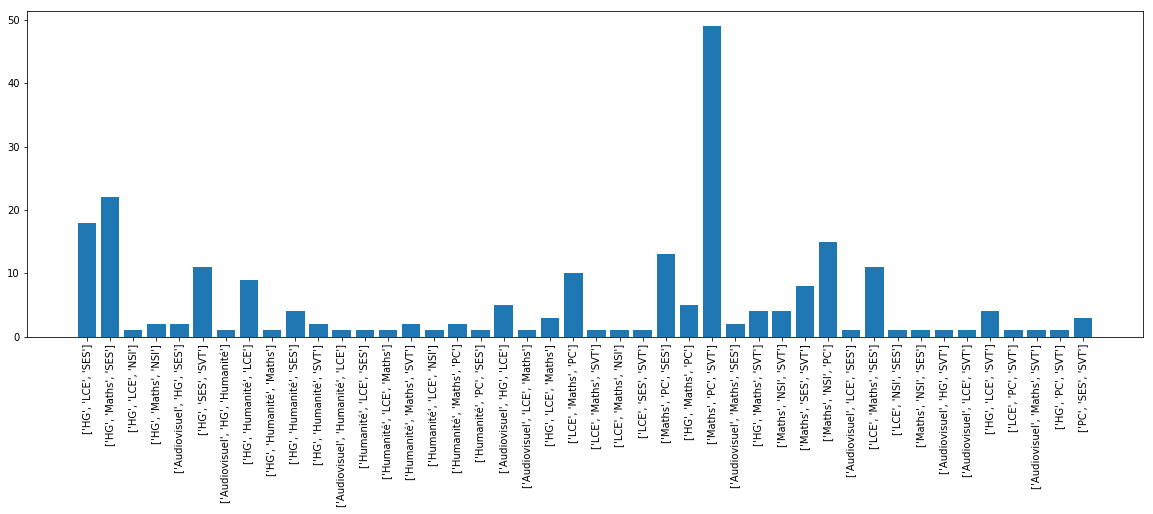

In [38]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(dico_triplet.keys(), dico_triplet.values())
plt.xticks(rotation=90)